In [1]:
import pandas_datareader.data as pdr
import yfinance as yf
yf.pdr_override()
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
from scipy.stats import rankdata

# 글로벌 자산배분에 많이 사용되는 대표적인 10개 자산군
# (1) 미국 주식 / (2) 유럽 주식 / (3) 일본 주식 / (4) 이머징 주식 (5) 미 장기채 
# (6) 미 중기채 / (7) 미국 리츠 / (8) 글로벌 리츠 (9) 금 / (10) 상품

# 자산배분의 방법 
# 1) 주식과 채권 외에 상관관계가 낮은 자산군을 추가하여 분산 투자 (전략적 자산배분: Strategic Asset Allocation, SAA)
# 2) 미래 수익률과 변동성을 추정하여 자산 간 비중 조절 (전술적 자산배분: Tactical Asset Allocation, TAA)

tickers = ['SPY', 'IEV', 'EWJ', 'EEM', 'TLT', 'IEF', 'IYR', 'RWX', 'GLD', 'DBC']
start = '2007-12-30'

# SPY : SPDR S&P 500 (SPY)
# IEV : iShares Europe ETF (IEV)
# EWJ : iShares MSCI Japan ETF (EWJ)
# EEM : iShares MSCI Emerging Markets Indx (EEM)
# TLT : iShares Barclays 20+ Yr Treas.Bond (TLT)
# IEF : iShares Barclays 7-10 Year Trasry Bnd Fd (IEF)
# IYR : iShares US Real Estate ETF (IYR)
# RWX : SPDR Dow Jones Interntnl Real Estate ETF (RWX)
# GLD : SPDR Gold Shares (GLD)
# DBC : PowerShares DB Com Indx Trckng Fund (DBC)


all_data = {}
for ticker in tickers:
    all_data[ticker] = pdr.get_data_yahoo(ticker, start)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [2]:
print(all_data)

{'SPY':                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2007-12-31  147.100006  147.610001  146.059998  146.210007  113.084785   
2008-01-02  146.529999  146.990005  143.880005  144.929993  112.094788   
2008-01-03  144.910004  145.490005  144.070007  144.860001  112.040657   
2008-01-04  143.339996  143.440002  140.910004  141.309998  109.294922   
2008-01-07  141.809998  142.229996  140.100006  141.190002  109.202126   
...                ...         ...         ...         ...         ...   
2020-07-27  321.630005  323.410004  320.769989  323.220001  323.220001   
2020-07-28  322.429993  323.640015  320.850006  321.170013  321.170013   
2020-07-29  322.119995  325.730011  322.079987  325.119995  325.119995   
2020-07-30  321.899994  324.410004  319.640015  323.959991  323.959991   
2020-07-31  325.899994  326.630005  321.329987  326.519989  326.519989   

               Volume  
Date 

In [8]:
# 딕셔너리에서 data중 수정주가부분만 갖고오고 그 중에 해당 티커만 데이터를 가져온다.
prices = pd.DataFrame({tic : data['Adj Close'] for tic, data in all_data.items()})
prices = prices.fillna(method = 'ffill')
print(prices)
rets = prices.pct_change(1)
rets = rets.dropna()
# print(rets)
# 데이터프레임 곱셉 테스트...
# rets.iloc[0, :]=(1+rets.iloc[0,:])*rets.iloc[1,:].values
# print(rets.iloc[0, :])

SPY        IEV        EWJ        EEM         TLT  \
Date                                                                  
2007-12-31  113.084785  39.099037  43.695107  38.769268   63.840546   
2008-01-02  112.094788  38.993038  43.497841  38.129551   64.759956   
2008-01-03  112.040657  39.061424  43.662231  38.472626   64.670738   
2008-01-04  109.294922  38.144997  42.544369  37.317028   64.684471   
2008-01-07  109.202126  38.336491  42.281345  37.590454   64.965790   
...                ...        ...        ...        ...         ...   
2020-07-27  323.220001  42.930000  56.939999  43.810001  169.110001   
2020-07-28  321.170013  42.770000  56.590000  43.450001  170.279999   
2020-07-29  325.119995  43.259998  56.619999  44.150002  169.990005   
2020-07-30  323.959991  42.619999  55.770000  43.590000  171.110001   
2020-07-31  326.519989  41.709999  54.330002  43.290001  171.000000   

                   IEF        IYR        RWX         GLD        DBC  
Date                     

In [11]:
# 거래비용 (수익률 차이) 30bp
fee = 0.0030
# n 개월 모멘텀
lookback = 12
# 상위 n개 종목
num = 5
print(np.arange(1,5))
# 월말 기준이 되는 지점 찾기
s = pd.Series(np.arange(prices.shape[0]), index=prices.index)
# np.arange와 np.linspace는 모두 시작점과 끝점사이의 간격에서 원하는 step의 크기만큼 일정하게 떨어져 있는 숫자들을 array로 형태로 반환해 주는 함수. 차이점은 arange은 끝점 미포함, linspace는 끝점 포함
# print(s)
# 시계열 데이터 리샘플링. (구간이 커지는 (일->달) 다운샘플링임) 각 달의 마지막날을 갖고옴
# 참고 : https://datascienceschool.net/view-notebook/8959673a97214e8fafdb159f254185e9/
ep = s.resample("1M").max()
print(ep)

[1 2 3 4]
Date
2007-12-31       0
2008-01-31      21
2008-02-29      41
2008-03-31      61
2008-04-30      83
              ... 
2020-03-31    3083
2020-04-30    3104
2020-05-31    3124
2020-06-30    3146
2020-07-31    3168
Freq: M, Length: 152, dtype: int32


In [17]:
wts = list()
# 자산간 비중 정하기
# 과거 12개월 수익률로 랭킹을 매기고 해당 랭킹의 자산의 차월 수익률이 1-num 등 내로 든 것만 동일 비중으로 가중치 선정
for i in range(lookback, len(ep)) :
    # print(prices.index[ep[i]])       # check the calendar
    # 과거 12개월 수익률 계산
    # 처음 12개의 차월 수익률(과거 12개월을 이용)은 과거를 제일 최신것으로 계산하므로 오류가 있기 때문에 처음 12개월은 고려안해서 loopback부터 for문 시작...
    cumret = prices.iloc[ep[i]] / prices.iloc[ep[i-12]] - 1
    # print(i, cumret)
    # 각 월말 기준 수익률 상위 5개 선택(T/F), rankdata는 작을수록 1등이므로 마이너스 붙여줌
    K = rankdata(-cumret) <= num
    # print(K)
    
    # 각 월말 기준 수익률 prices.shape[1] (종목 수) 개 중 상위 num개 종목에 비중 1/num 만큼 배분
    wt = np.repeat(0.00, prices.shape[1], axis = 0)
    # print(wt)
    wt[K] = 1 / num
    wt = pd.DataFrame(data = wt.reshape(1,prices.shape[1]),
                      index = [prices.index[ep[i]]],
                      columns = [prices.columns])
    # print(wt)
    wts.append(wt)
# print(wts)
wts = pd.concat(wts)
# pd.concat(df1,df2,df3,...,df140)
print(type(wts))
print(wts)
print(len(wts))
# 즉 월말마다 비중을 시계열 형태로 위의 논리대로 정하여 데이터 프레임 형태로 저장

<class 'pandas.core.frame.DataFrame'>
            SPY  IEV  EWJ  EEM  TLT  IEF  IYR  RWX  GLD  DBC
2008-12-31  0.0  0.0  0.2  0.0  0.2  0.2  0.0  0.0  0.2  0.2
2009-01-30  0.0  0.0  0.2  0.0  0.2  0.2  0.0  0.0  0.2  0.2
2009-02-27  0.2  0.0  0.2  0.0  0.2  0.2  0.0  0.0  0.2  0.0
2009-03-31  0.2  0.0  0.2  0.0  0.2  0.2  0.0  0.0  0.2  0.0
2009-04-30  0.2  0.0  0.2  0.0  0.2  0.2  0.0  0.0  0.2  0.0
...         ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
2020-03-31  0.2  0.0  0.2  0.0  0.2  0.2  0.0  0.0  0.2  0.0
2020-04-30  0.2  0.0  0.2  0.0  0.2  0.2  0.0  0.0  0.2  0.0
2020-05-29  0.2  0.0  0.2  0.0  0.2  0.2  0.0  0.0  0.2  0.0
2020-06-30  0.2  0.0  0.2  0.0  0.2  0.2  0.0  0.0  0.2  0.0
2020-07-31  0.2  0.0  0.0  0.2  0.2  0.2  0.0  0.0  0.2  0.0

[140 rows x 10 columns]
140


In [19]:
# https://hyunyulhenry.github.io/quant_cookbook/%ED%8F%AC%ED%8A%B8%ED%8F%B4%EB%A6%AC%EC%98%A4-%EB%B0%B1%ED%85%8C%EC%8A%A4%ED%8A%B8.html
# 위 사이트 포트폴리오 백테스트 Return portfolio 개념 참고
# R은 수익률 데이터, weights는 위에서 구한 비중이 들어감
def ReturnPortfolio(R, weights):
    if R.isnull().values.any() :
        print("NA's detected: filling NA's with zeros")
        R[np.isnan(R)] = 0

    if R.shape[1] != weights.shape[1] :
        print("Columns of Return and Weight is not same")        ## Check The Column Dimension
               
    if R.index[-1] < weights.index[0] + pd.DateOffset(days=1) :
        print("Last date in series occurs before beginning of first rebalancing period")
           
    if R.index[0] < weights.index[0] :
        print("Subset the Return object if the first rebalance date is after the first date ")
        R = R.loc[R.index > weights.index[0] + pd.DateOffset(days=1)]
    # print(R)
    bop_value = pd.DataFrame(data = np.zeros(shape = (R.shape[0], R.shape[1])), index = R.index, columns = [R.columns])
    # print("bop")
    # print(bop_value)
    eop_value = pd.DataFrame(data = np.zeros(shape = (R.shape[0], R.shape[1])), index = R.index, columns = [R.columns])
    # print("eop")
    # print(eop_value)
    bop_weights = pd.DataFrame(data = np.zeros(shape = (R.shape[0], R.shape[1])), index = R.index, columns = [R.columns])
    # print("bopw")
    # print(bop_weights)
    eop_weights = pd.DataFrame(data = np.zeros(shape = (R.shape[0], R.shape[1])), index = R.index, columns = [R.columns])
    # print("eopw")
    # print(eop_weights)
    
    bop_value_total = pd.DataFrame(data = np.zeros(shape = R.shape[0]), index = R.index)
    eop_value_total = pd.DataFrame(data = np.zeros(shape = R.shape[0]), index = R.index)
    ret = pd.DataFrame(data = np.zeros(shape = R.shape[0]), index = R.index)
                       
    end_value = 1   # The end_value is the end of period total value from the prior period
    k=0
    # 달 기준
    for i in range(0 , len(weights) -1 ) :
        fm = weights.index[i] + pd.DateOffset(days=1)
        # print("fm=", fm)
        to = weights.index[i + 1]
        # print("to=", to)            
        returns = R.loc[fm : to, ]
        # print("returns", returns)

        jj = 0
        
        # 해당 달의 일 기준 k는 일을 따라가고 j는 해당 월의 일을 따라감
        for j in range(0 , len(returns)) :
            # 해당 달의 첫일은 따로 케이스 분류 (bop 계산이 다름)
            if jj == 0 :
                bop_value.iloc[k,:] = end_value * weights.iloc[i,:]
                # print("Month first")
                # print(bop_value.iloc[k,:])
            else :
                bop_value.iloc[k,:] = eop_value.iloc[k-1,:]
                # print("Month later")
                # print(bop_value.iloc[k,:])
            
            bop_value_total.iloc[k] = bop_value.iloc[k,:].sum()
                        
            # Compute end of period values

            # print('return iloc')
            # print(returns.iloc[j,:])
            # (1 + returns.iloc[j,:]) * bop_value.iloc[k,:] 계산 안됨.
            # (1 + returns.iloc[j,:]) * bop_value.iloc[k,:].values 계산 됨. 단 list로 바꿔서 데이터프레임에 넣어줘야함
            # list 넣어줘야함... (왜 이런지는 정확히 모르겠음...테스트해봐도 의문인 부분. list 안해주면 nan값 나옴)
            eop_value.iloc[k,:] = list((1 + returns.iloc[j,:]) * bop_value.iloc[k,:].values)
            # print('eop_value')
            # print((1 + returns.iloc[j,:]) * bop_value.iloc[k,:].values)
            # print(eop_value.iloc[k,:])
            eop_value_total.iloc[k] = eop_value.iloc[k, :].sum()
            # print('eop_totvalue')
            # print(eop_value_total.iloc[k])

            # Compute portfolio returns
            ret.iloc[k] = float(eop_value_total.iloc[k] / end_value) - 1
            # print('port ret')
            # print(ret.iloc[k])
            end_value = float(eop_value_total.iloc[k])
            # print('end_val')
            # print(end_value)
            
            # Compute BOP and EOP weights
            bop_weights.iloc[k, :] = bop_value.iloc[k, :] / float(bop_value_total.iloc[k])
            eop_weights.iloc[k, :] = eop_value.iloc[k, :] / float(eop_value_total.iloc[k])
    
            jj += 1
            k += 1
    
    result = {'ret' : ret, 'bop_weights' : bop_weights, 'eop_weights' : eop_weights}
    return result 


In [20]:
result = ReturnPortfolio(rets, wts)
# print(result)
portfolio_ret = result['ret']
turnover = pd.DataFrame((result['eop_weights'].shift(1) - result['bop_weights']).abs().sum(axis = 1))
portfolio_ret_net = portfolio_ret - (turnover * fee)
print(portfolio_ret)
print(portfolio_ret_net)

Subset the Return object if the first rebalance date is after the first date 
{'ret':                    0
Date                
2009-01-02 -0.000531
2009-01-05 -0.012264
2009-01-06  0.003105
2009-01-07 -0.017724
2009-01-08  0.008018
...              ...
2020-07-27  0.008417
2020-07-28  0.001073
2020-07-29  0.004054
2020-07-30 -0.003664
2020-07-31 -0.001603

[2915 rows x 1 columns], 'bop_weights':                  SPY  IEV       EWJ  EEM       TLT       IEF  IYR  RWX  \
Date                                                                     
2009-01-02  0.000000  0.0  0.200000  0.0  0.200000  0.200000  0.0  0.0   
2009-01-05  0.000000  0.0  0.201151  0.0  0.195076  0.197243  0.0  0.0   
2009-01-06  0.000000  0.0  0.198573  0.0  0.192406  0.199342  0.0  0.0   
2009-01-07  0.000000  0.0  0.196061  0.0  0.189881  0.198602  0.0  0.0   
2009-01-08  0.000000  0.0  0.197667  0.0  0.194065  0.202227  0.0  0.0   
...              ...  ...       ...  ...       ...       ...  ...  ...   
2020-07-

In [11]:
# 누적 수익률 구하는 함수
def ReturnCumulative(R) :
    R[np.isnan(R)] = 0
    
    temp = (1+R).cumprod()-1
    print("Total Return: ", round(temp.iloc[-1, :], 4)) 
    return(temp)

port_cumret = ReturnCumulative(portfolio_ret_net)

# drawdown 구하는 함수
def drawdown(R) :
    dd = pd.DataFrame(data = np.zeros(shape = (R.shape[0], R.shape[1])), index = R.index, columns = [R.columns])
    R[np.isnan(R)] = 0
    
    for j in range(0, R.shape[1]):
        
        if (R.iloc[0, j] > 0) :
            dd.iloc[0, j] = 0
        else :
            dd.iloc[0, j] = R.iloc[0, j]
            
        for i in range(1 , len(R)):
            temp_dd = (1+dd.iloc[i-1, j]) * (1+R.iloc[i, j]) - 1
            if (temp_dd > 0) :
                dd.iloc[i, j] = 0
            else:
                dd.iloc[i, j] = temp_dd
    
    return(dd)
    
port_dd = drawdown(portfolio_ret_net)

Total Return:  0    1.175
Name: 2020-07-27 00:00:00, dtype: float64


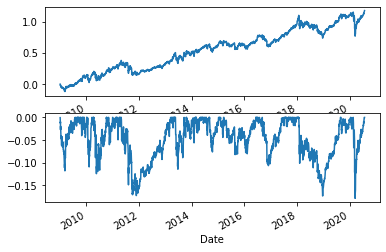

In [12]:
# 누적수익률과 drawdown
fig, axes = plt.subplots(2, 1)
port_cumret.plot(ax = axes[0], legend = None)
port_dd.plot(ax = axes[1], legend = None)

0
Date          
2009  0.120535
2010  0.130253
2011 -0.079491
2012  0.129956
2013  0.154657
2014  0.057614
2015  0.012216
2016 -0.000469
2017  0.200100
2018 -0.088066
2019  0.183173
2020  0.032009


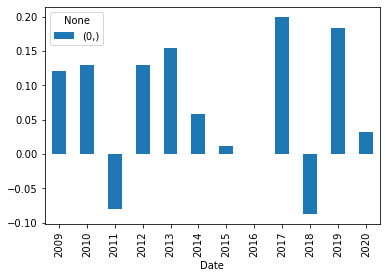

In [18]:
# 일별 수익률을 년도별 수익률로 바꾸는 함수
def apply_yearly(R) :
    
    s = pd.Series(np.arange(R.shape[0]), index=R.index)
    # 연간기준으로 리샘플링(다운샘플링)
    ep = s.resample("A").max()
    temp = pd.DataFrame(data = np.zeros(shape = (ep.shape[0], R.shape[1])), index = ep.index.year, columns = [R.columns])

    for i in range(0 , len(ep)) :
        if (i == 0) :
            sub_ret = R.iloc[0:ep[i]+1, :]
        else :
            sub_ret = R.iloc[ep[i-1]+1:ep[i]+1, :]
        # 이산 수익률
        temp.iloc[i, ] = list((1 + sub_ret).prod() - 1)
    
    return(temp)

# 연 환산 수익률
yr_ret = apply_yearly(portfolio_ret_net)
print(yr_ret)
yr_ret.plot(kind = 'bar')

In [ ]:
# 기초 더 나아가기 : 동적자산배분(tactical asset allocation)을 risk parity와 target volatility를 이용해 구현
# http://henryquant.blogspot.com/search/label/Programming?updated-max=2017-10-29T11:49:0%2B09:00&max-results=1&pgno=8